In [1]:
import scanpy as sc
import scvelo as scv

In [3]:
adata = sc.read('../../../../erythroid_lineage.h5ad')

In [4]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)

Filtered out 47456 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.


In [5]:
scv.pp.pca(adata)
scv.pp.neighbors(adata, n_pcs=30, n_neighbors=30)
scv.pp.moments(adata, n_pcs=None, n_neighbors=None)

computing neighbors
    finished (0:00:18) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [6]:
scv.tl.recover_dynamics(adata, n_jobs=12)
scv.tl.velocity(adata, mode='dynamical', vkey='dynvelo', n_jobs=12)
scv.tl.velocity(adata, mode='stochastic', vkey='stocvelo', n_jobs=12)

recovering dynamics (using 12/16 cores)


  0%|          | 0/568 [00:00<?, ?gene/s]

    finished (0:02:19) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:04) --> added 
    'dynvelo', velocity vectors for each individual cell (adata.layers)
computing velocities
    finished (0:00:01) --> added 
    'stocvelo', velocity vectors for each individual cell (adata.layers)


In [7]:
scv.tl.velocity_graph(adata, vkey='dynvelo', n_jobs=12)
scv.tl.velocity_graph(adata, vkey='stocvelo', n_jobs=12)

computing velocity graph (using 12/16 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:06) --> added 
    'dynvelo_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity graph (using 12/16 cores)


  0%|          | 0/9815 [00:00<?, ?cells/s]

    finished (0:00:05) --> added 
    'stocvelo_graph', sparse matrix with cosine correlations (adata.uns)


In [8]:
import latentvelo as ltv


cluster_edges = [
    ('Blood progenitors 1', 'Blood progenitors 2'), 
    ('Blood progenitors 2', 'Erythroid1'),
    ('Erythroid1', 'Erythroid2'), 
    ('Erythroid2', 'Erythroid3')]

Global seed set to 0


In [9]:
scv.tl.velocity_embedding(adata, vkey='dynvelo', basis='pca')
dyn_pca = ltv.ev.cross_boundary_correctness(adata,
                                  'celltype', 'dynvelo_pca', cluster_edges, x_emb='X_pca', 
                                   majority_vote=True, return_raw=True)

scv.tl.velocity_embedding(adata, vkey='stocvelo', basis='pca')
stoc_pca = ltv.ev.cross_boundary_correctness(adata,
                                  'celltype', 'stocvelo_pca', cluster_edges, x_emb='X_pca', 
                                   majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:02) --> added
    'dynvelo_pca', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:02) --> added
    'stocvelo_pca', embedded velocity vectors (adata.obsm)


In [10]:
adata.obsm['X_pca_10'] = adata.obsm['X_pca'][:,:10]

scv.tl.velocity_embedding(adata, vkey='dynvelo', basis='pca_10')
dyn_pca_10 = ltv.ev.cross_boundary_correctness(adata,
                                  'celltype', 'dynvelo_pca_10', cluster_edges, x_emb='X_pca_10', 
                                   majority_vote=True, return_raw=True)

scv.tl.velocity_embedding(adata, vkey='stocvelo', basis='pca_10')
stoc_pca_10 = ltv.ev.cross_boundary_correctness(adata,
                                  'celltype', 'stocvelo_pca_10', cluster_edges, x_emb='X_pca_10', 
                                   majority_vote=True, return_raw=True)

computing velocity embedding
    finished (0:00:01) --> added
    'dynvelo_pca_10', embedded velocity vectors (adata.obsm)
computing velocity embedding
    finished (0:00:01) --> added
    'stocvelo_pca_10', embedded velocity vectors (adata.obsm)


In [11]:
dyn_pca_iccoh = ltv.ev.inner_cluster_coh(adata,
                                  'celltype', 'dynvelo_pca', return_raw=True, layer=False)
dyn_pca_10_iccoh = ltv.ev.inner_cluster_coh(adata,
                                  'celltype', 'dynvelo_pca_10', return_raw=True, layer=False)


stoc_pca_iccoh = ltv.ev.inner_cluster_coh(adata,
                                  'celltype', 'stocvelo_pca', return_raw=True, layer=False)
stoc_pca_10_iccoh = ltv.ev.inner_cluster_coh(adata,
                                  'celltype', 'stocvelo_pca_10', return_raw=True, layer=False)

In [12]:
import numpy as np

np.save("fits/mouse_erythroid_dynvelo_pca.npy", dyn_pca)
np.save("fits/mouse_erythroid_dynvelo_pca_10.npy", dyn_pca_10)

np.save("fits/mouse_erythroid_stocvelo_pca.npy", stoc_pca)
np.save("fits/mouse_erythroid_stocvelo_pca_10.npy", stoc_pca_10)

np.save("fits/mouse_erythroid_dynvelo_iccoh_pca.npy", dyn_pca_iccoh)
np.save("fits/mouse_erythroid_dynvelo_iccoh_pca_10.npy", dyn_pca_10_iccoh)

np.save("fits/mouse_erythroid_stoc_iccoh_pca.npy", stoc_pca_iccoh)
np.save("fits/mouse_erythroid_stoc_iccoh_pca_10.npy", stoc_pca_10_iccoh)

computing velocity embedding
    finished (0:00:01) --> added
    'dynvelo_umap', embedded velocity vectors (adata.obsm)


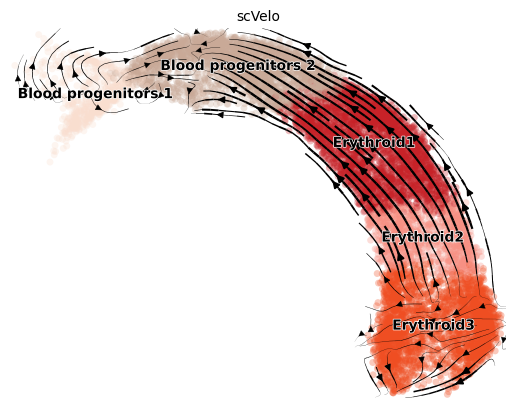

computing velocity embedding
    finished (0:00:01) --> added
    'stocvelo_umap', embedded velocity vectors (adata.obsm)


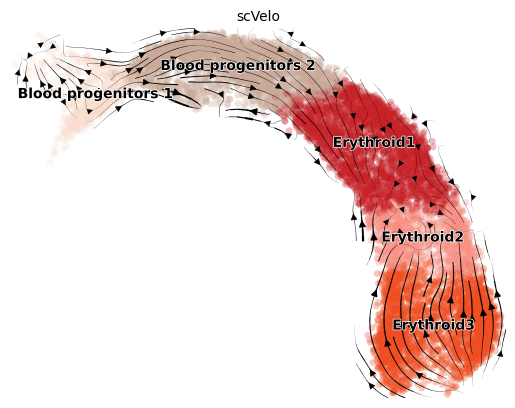

In [14]:
scv.pl.velocity_embedding_stream(adata, vkey='dynvelo', color=['celltype'],title=['scVelo'])
scv.pl.velocity_embedding_stream(adata, vkey='stocvelo', color=['celltype'],title=['scVelo'])

In [15]:
adata.layers['velo_s'] = adata.layers['dynvelo']
adata.layers['velo_u'] = adata.layers['dynvelo_u']

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
s_gene = np.array(adata[:,adata.var.index=='Smim1'].layers['Ms'])[:,0] #[:,None]
u_gene = np.array(adata[:,adata.var.index=='Smim1'].layers['Mu'])[:,0] #[:,None]

adata.obsm['X_Smim1'] = np.concatenate((s_gene[:,None], u_gene[:,None]), axis=-1)

vs_gene = np.array(adata[:,adata.var.index=='Smim1'].layers['velo_s'])[:,0]
vu_gene = np.array(adata[:,adata.var.index=='Smim1'].layers['velo_u'])[:,0]


x = np.linspace(s_gene.min()*1.1, s_gene.max()*0.9, 250)
y = np.linspace(u_gene.min()*1.1, u_gene.max()*0.9, 250)

from scipy.interpolate import griddata

S, U = np.meshgrid(x, y)# s_gene, u_gene)

VS = griddata((s_gene, u_gene), vs_gene, (S, U), method='linear')
VU = griddata((s_gene, u_gene), vu_gene, (S, U), method='linear')

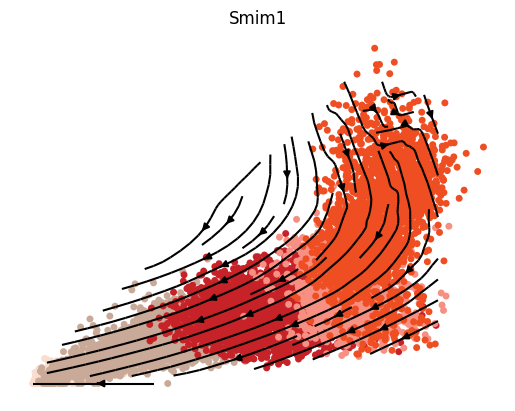

In [18]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
plt.streamplot(S, U, VS, VU, color='k', linewidth=1.5)
sc.pl.scatter(adata, basis='Smim1', color='celltype', ax=ax, title = 'Smim1',
              frameon=False, legend_loc='none', show=False, size=100)
plt.show()
#plt.savefig('figures/scvelo_Smim1.pdf')
#mv.scatter_plot(adata, ['Smim1'], color_by='latent_time', by='us', velocity_arrows=True, show_switches=False,
#               show_anchors=False,figsize=(25,10), downsample=5,axis=ax)

In [19]:
s_gene = np.array(adata[:,adata.var.index=='Abcg2'].layers['Ms'])[:,0] #[:,None]
u_gene = np.array(adata[:,adata.var.index=='Abcg2'].layers['Mu'])[:,0] #[:,None]

adata.obsm['X_Abcg2'] = np.concatenate((s_gene[:,None], u_gene[:,None]), axis=-1)

vs_gene = np.array(adata[:,adata.var.index=='Abcg2'].layers['velo_s'])[:,0]
vu_gene = np.array(adata[:,adata.var.index=='Abcg2'].layers['velo_u'])[:,0]


x = np.linspace(s_gene.min()*1.1, s_gene.max()*0.9, 250)
y = np.linspace(u_gene.min()*1.1, u_gene.max()*0.9, 250)

from scipy.interpolate import griddata

S, U = np.meshgrid(x, y)# s_gene, u_gene)

VS = griddata((s_gene, u_gene), vs_gene, (S, U), method='linear')
VU = griddata((s_gene, u_gene), vu_gene, (S, U), method='linear')

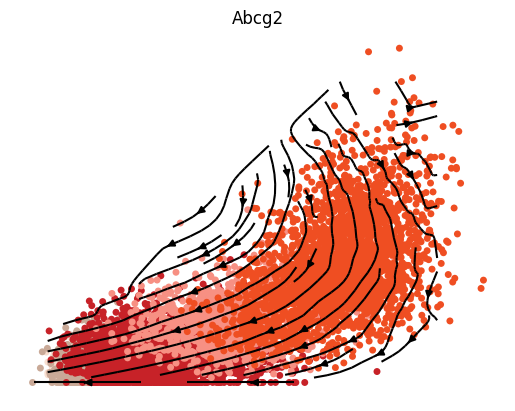

In [20]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
plt.streamplot(S, U, VS, VU, color='k', linewidth=1.5)
sc.pl.scatter(adata, basis='Abcg2', color='celltype', ax=ax, title = 'Abcg2',
              frameon=False, legend_loc='none', show=False, size=100)
#plt.savefig('figures/scvelo_Abcg2.pdf')
plt.show()
#mv.scatter_plot(adata, ['Smim1'], color_by='latent_time', by='us', velocity_arrows=True, show_switches=False,
#               show_anchors=False,figsize=(25,10), downsample=5,axis=ax)